# Initial EDA
### Case Study 5, DAEN 400
October 31st, 2025

In [30]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Zillow data set

In [2]:
zillow_df = pd.read_csv('Zip_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv')

In [3]:
zillow_df = zillow_df[zillow_df['RegionName'] == 76065]

In [4]:
# Suppose your DataFrame is called zillow_df
# Identify the non-date columns (you said there are 9 of them)
non_date_cols = ['RegionID', 'SizeRank', 'RegionName', 'RegionType', 
                 'StateName', 'State', 'City', 'Metro', 'CountyName']

# Melt (unpivot) the DataFrame
zillow_df = zillow_df.melt(
    id_vars=non_date_cols,
    var_name='Date',
    value_name='ZHVI'
)

# Convert the Date column to datetime if needed
zillow_df['Date'] = pd.to_datetime(zillow_df['Date'], errors='coerce')

# Drop rows with NaN in Date (if there were any non-date columns that slipped in)
zillow_df = zillow_df.dropna(subset=['Date', 'ZHVI']).reset_index(drop=True)


In [5]:
zillow_df

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,Date,ZHVI
0,91223,1922,76065,zip,TX,TX,Midlothian,"Dallas-Fort Worth-Arlington, TX",Ellis County,2009-01-31,188438.751221
1,91223,1922,76065,zip,TX,TX,Midlothian,"Dallas-Fort Worth-Arlington, TX",Ellis County,2009-02-28,188099.168468
2,91223,1922,76065,zip,TX,TX,Midlothian,"Dallas-Fort Worth-Arlington, TX",Ellis County,2009-03-31,187923.385526
3,91223,1922,76065,zip,TX,TX,Midlothian,"Dallas-Fort Worth-Arlington, TX",Ellis County,2009-04-30,187400.473974
4,91223,1922,76065,zip,TX,TX,Midlothian,"Dallas-Fort Worth-Arlington, TX",Ellis County,2009-05-31,186960.172194
...,...,...,...,...,...,...,...,...,...,...,...
196,91223,1922,76065,zip,TX,TX,Midlothian,"Dallas-Fort Worth-Arlington, TX",Ellis County,2025-05-31,453405.242441
197,91223,1922,76065,zip,TX,TX,Midlothian,"Dallas-Fort Worth-Arlington, TX",Ellis County,2025-06-30,452048.962695
198,91223,1922,76065,zip,TX,TX,Midlothian,"Dallas-Fort Worth-Arlington, TX",Ellis County,2025-07-31,450995.150491
199,91223,1922,76065,zip,TX,TX,Midlothian,"Dallas-Fort Worth-Arlington, TX",Ellis County,2025-08-31,450762.653868


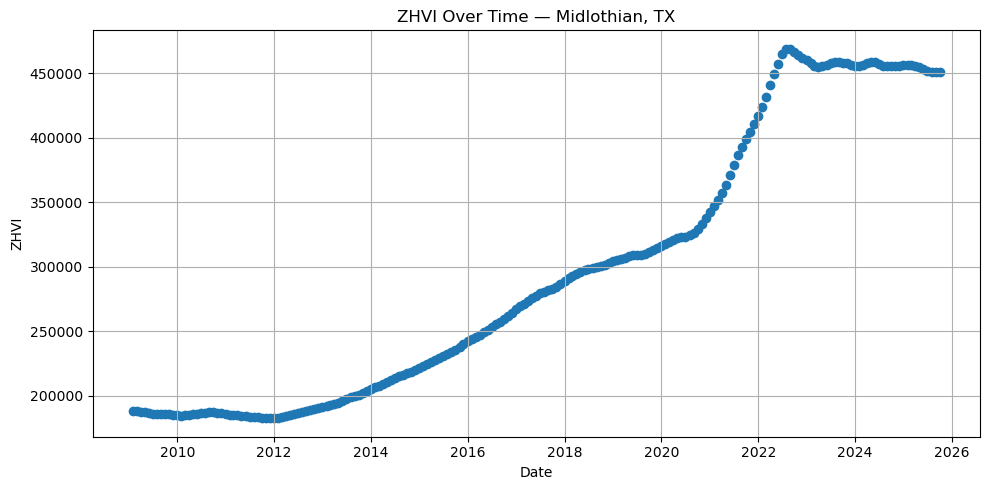

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.scatter(zillow_df['Date'], zillow_df['ZHVI'], marker='o')
plt.title(f"ZHVI Over Time — Midlothian, TX")
plt.xlabel("Date")
plt.ylabel("ZHVI")
plt.grid(True)
plt.tight_layout()
plt.show()


# Realtor.com data set

In [24]:
realtor_df = pd.read_csv('RDC_Inventory_Hotness_Metrics_Zip_History.csv')

In [34]:
realtor_df = realtor_df[realtor_df['postal_code'] == 76065]

def parse_date(row):
    year = str(row['month_date_yyyymm'])[0:4]
    month = str(row['month_date_yyyymm'])[4:]
    day = '01' # Default to first day of month

    date = '-'.join([year, month, day])
    
    return date

realtor_df['Date'] = realtor_df.apply(parse_date, axis=1)

# Type cast date
realtor_df['Date'] = pd.to_datetime(realtor_df['Date'])

# Sort chronilogicaly 
realtor_df = realtor_df.sort_values(by='Date')

<Figure size 1000x500 with 0 Axes>

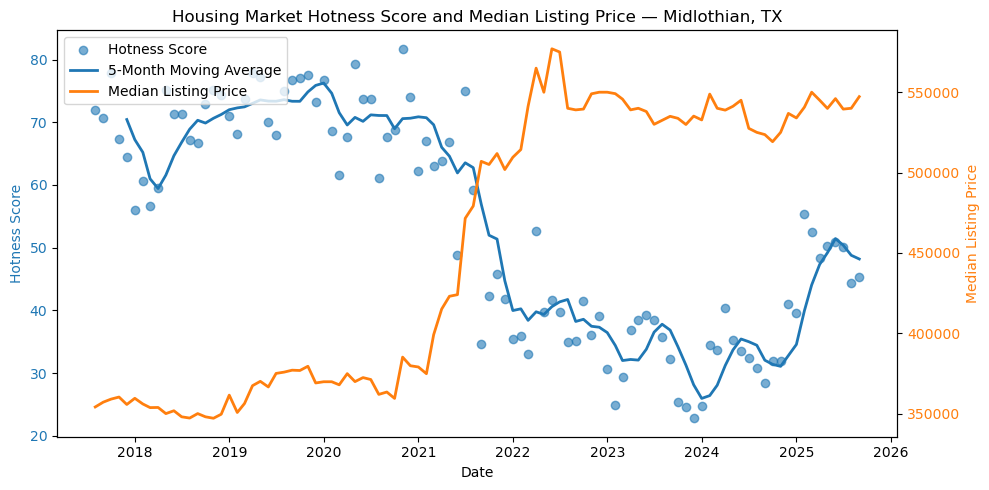

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

# --- Left axis (Hotness Score) ---
fig, ax1 = plt.subplots(figsize=(10, 5))
ax1.scatter(realtor_df['Date'], realtor_df['hotness_score'], marker='o', alpha=0.6, label='Hotness Score', color='tab:blue')

# 5-month moving average
realtor_df['MA'] = realtor_df['hotness_score'].rolling(window=5).mean()
ax1.plot(realtor_df['Date'], realtor_df['MA'], linewidth=2, color='tab:blue', label='5-Month Moving Average')

ax1.set_xlabel("Date")
ax1.set_ylabel("Hotness Score", color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# --- Right axis (Median Listing Price) ---
ax2 = ax1.twinx()  # create secondary y-axis sharing the same x-axis
ax2.plot(realtor_df['Date'], realtor_df['median_listing_price'], color='tab:orange', linewidth=2, label='Median Listing Price')
ax2.set_ylabel("Median Listing Price", color='tab:orange')
ax2.tick_params(axis='y', labelcolor='tab:orange')

# --- Formatting ---
plt.title("Housing Market Hotness Score and Median Listing Price — Midlothian, TX")
fig.tight_layout()
plt.grid(True, which='major', axis='x', linestyle='--', alpha=0.7)

# --- Combined Legend ---
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')

plt.show()

In [50]:
realtor_df['median_listing_price']

304220     354118.25
526105     357115.50
142123     358999.50
374731     360298.25
990891     355673.00
             ...    
27380      539900.00
697061     546000.00
897870     539475.00
816133     540000.00
1044691    547237.50
Name: median_listing_price, Length: 98, dtype: float64